____

# Проект: Статистический анализ данных GoFast

_____

**Название проекта:**

Статистический анализ данных сервиса аренды самокатов GoFast
_____
**Цель исследования:**

Провести предварительный анализ использования тарифов на выборке клиентов сервиса самокатов.
_____
**Задачи исследования:**

1. Проанализировать поведение клиентов при использовании услуг. 
2. Проверить статистические гипотезы на основе имеющихся данных.
_____
**Исходные данные:**
    
В качестве материала для анализа были получены 3 файла .csv с информацией о пользователях, их поездках и подписках.
______

**Работа над данным проектом была разделена на 7 шагов:**

1) [Изучение общей информации](#start)

2) [Предобработка данных](#prework)
- [2.1 Типы данных](#prework1)
- [2.2 Дибликаты в данных](#prework2)
- [2.3 Создание нового столбца](#prework3)
- [2.4 Временной период](#prework4)

3) [Исследовательский анализ данных](#research)
- [3.1 Частота встречаемости городов](#research1)
- [3.2 Соотношение пользователей с подпиской и без подписки](#research2)
- [3.3 Возраст пользователей](#research3)
- [3.4 Расстояние, которое пользователь преодолел за одну поездку](#research4)
- [3.5 Продолжительность поездок](#research5)

4) [Объединение данных](#merge)
- [4.1 Объединение датасетов](#merge1)
- [4.2 Создание датасетов пользователей "с подпиской" и "без подписки"](#merge2)
- [4.3 Визуализация информации о времени и расстоянии поездок для пользователей обеих категорий](#merge3)

5) [Подсчёт выручки](#revenue)

6) [Проверка гипотез](#yesno)
- [6.1 Проверка "времени"](#yesno1)
- [6.2 Проверка "расстояния"](#yesno2)
- [6.3 Проверка "выручки"](#yesno3)
- [6.4 Проверка "изменения"](#yesno4)

7) [Распределения](#distr)
- 7.1
- 7.2

8) [Вывод](#end)

9) [Рекомендации](#endless)
_________________


</div>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)

____
<a id="start"></a>
## Изучение общей информации

____

In [2]:
users, rides, subscriptions = (
    pd.read_csv ('/datasets/users_go.csv'),
    pd.read_csv ('/datasets/rides_go.csv'),
    pd.read_csv ('/datasets/subscriptions_go.csv')
)

In [3]:
display (
users.head(),
rides.head(),
subscriptions.head()
)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
display (f'Датасет users {users.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


'Датасет users None'

In [5]:
display (f'Датасет rides {rides.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


'Датасет rides None'

In [6]:
display (f'Датасет subscriptions {subscriptions.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


'Датасет subscriptions None'

In [7]:
display (
users.columns,
rides.columns,
subscriptions.columns
)

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

Index(['user_id', 'distance', 'duration', 'date'], dtype='object')

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [8]:
display (
users.isna().sum(),
rides.isna().sum(),
subscriptions.isna().sum()
)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [9]:
display (
users.duplicated().sum(),
rides.duplicated().sum(),
subscriptions.duplicated().sum()
)

31

0

0

-----
**Пояснение:**

На данном этапе были открыты файлы с данными и сохранены в переменные 'users', 'rides' и 'subscriptions'. Далее была изучена общая информация по ним для возможности приступить к дальнейшим шагам работы.

В датасете 'users' находяться 5 столбцов, содержащих следующие данные:

- user_id - уникальный идентификатор пользователя;
- name - имя пользователя;
- age - возраст;
- city - город;
- subscription_type - тип подписки (free, ultra).

В датасете 'rides' находяться 4 столбца, содержащих следующие данные:

- user_id - уникальный идентификатор пользователя;
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
- duration - продолжительность сессии (в минутах);
- date - дата совершения поездки.

В датасете 'subscriptions' находяться 4 столбца, содержащих следующие данные:

- subscription_type - тип подписки;
- minute_price - стоимость одной минуты поездки по данной подписке;
- start_ride_price - стоимость начала поездки;
- subscription_fee - стоимость ежемесячного платежа.

Было обнаружено что, столбец 'date' из датасета 'rides' имеет некорректный тип данных, что может отразиться на будущих результатах, следовательно на следущем этапе данный столбец будет обработан для устранения такого рода ошибки.

При анализе заголовков столбцов не было выявлено никаких замечаний, которые должны подвергнуться дополнительному анализу. Также не было обнаружено пропущенных значений.

Однако, были обнаружены явные дубликаты в датасете 'users', который будет повторно обработан на следующем этапе для более детального рассмотрения данных.

---

___
<a id="prework"></a>
## Предобработка данных
___

<a id="prework1"></a>
### Типы данных

In [10]:
# Приведение столбца 'date' к временному типу данных
rides.date = pd.to_datetime(rides.date)
rides.date.dtypes

dtype('<M8[ns]')

___
<a id="prework2"></a>
### Дубликаты в данных

In [11]:
# Просмотр дубликатов
users[users.duplicated(keep = False)].sort_values(by = 'user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


In [12]:
# Удаление явных дубликатов
users = users.drop_duplicates()
users.duplicated().sum()

0

____
<a id="prework3"></a>
### Создание нового столбца

In [13]:
# Создание столбца 'month' в датасете rides с номером месяца 
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


____
<a id="prework4"></a>
### Временной период

In [14]:
rides.date.describe()

count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

___
**Пояснение:**

На данном этапе удалось:

1. Изменить тип данных строковых значений в столбце *date* в датасете `rides` на временной;

2. Удалить дубликаты в данных датасета `users`, которые являлись повторяющейся информацией по некоторым пользователям;

3. Создать новый столбец *month* с номером каждого месяца в датасете `rides`;

4. Определить исследуемый временной промежуток, который составил 1 год: с 2021-01-01 по 2021-12-30.
___

___
<a id="research"></a>
## Исследовательский анализ данных
___

<a id="research1"></a>
### Частота встречаемости городов

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

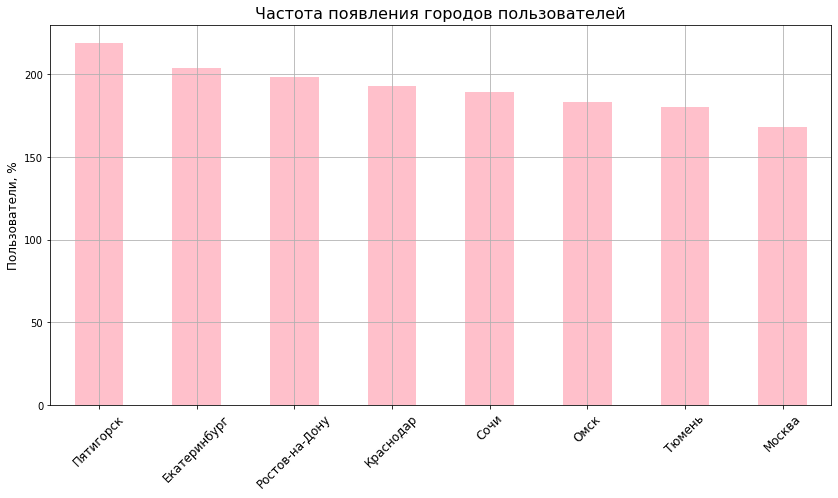

In [15]:
town = users.city.value_counts(ascending = False)
display(town)

ax = town.plot.bar(figsize = (14,7), color = 'pink', grid = True)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Частота появления городов пользователей', fontsize = 16)
plt.ylabel('Пользователи, %', fontsize = 12)
plt.show()

***Пояснение:***

- В данных представлены 8 городов, в которых работает сервис GoFast. 

- Топ-3 города по количеству пользователей: Пятигорск, Екатеринбург, Ростов-на-Дону. 

- Москва занимает последнее место, что противоречит статистическим данным, в которых говорится, что данный город является лидером в России и стремится к лидерству в мире по аренде электросамокатов. 

___
<a id="research2"></a>
### Cоотношение пользователей с подпиской и без подписки

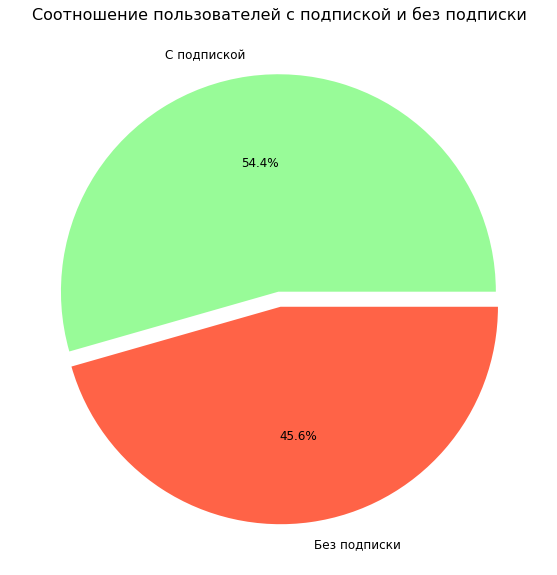

In [16]:
names = ['С подпиской', 'Без подписки']
colors = ['palegreen', 'tomato']
users.subscription_type.value_counts().plot(kind = 'pie', figsize = (10,10), subplots=True, \
                                            labels = names, autopct='%1.1f%%', colors = colors,\
                                           explode = [0.02, 0.05], textprops={'fontsize': 12})
plt.title('Соотношение пользователей с подпиской и без подписки', fontsize = 16)
plt.ylabel('')
plt.xlabel('')
plt.show()

,percent_ultra,percent_free
city,,
Екатеринбург,45.1,54.9
Краснодар,42.0,58.0
Москва,50.0,50.0
Омск,49.7,50.3
Пятигорск,42.9,57.1
Ростов-на-Дону,44.9,55.1
Сочи,45.5,54.5
Тюмень,45.6,54.4


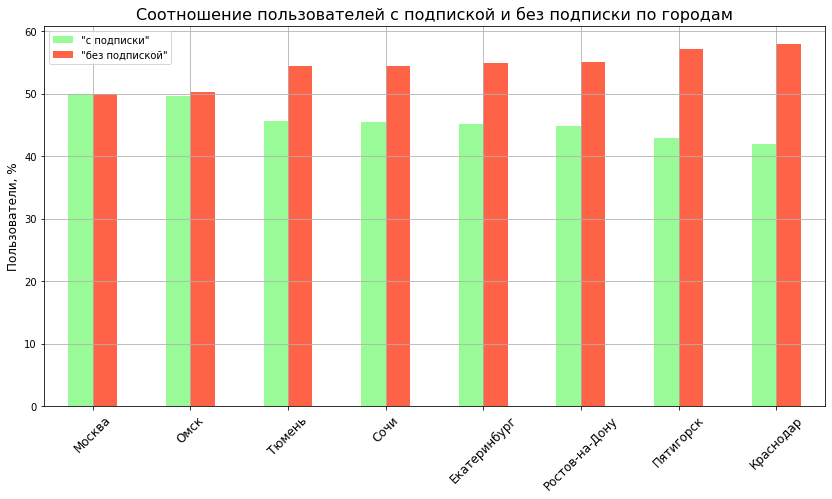

In [17]:
citys_ultra = users[users['subscription_type']=='ultra'].groupby('city')['user_id'].count().reset_index()
citys_ultra.columns = ['city', 'count_ultra']
citys_free = users[users['subscription_type']=='free'].groupby('city')['user_id'].count().reset_index()
citys_free.columns = ['city', 'count_free']
citys_sub = pd.merge(citys_ultra, citys_free, how = "inner", on = ['city', 'city'])
citys_sub['percent_ultra'] = round((citys_sub['count_ultra']/(citys_sub['count_ultra']+citys_sub['count_free']))*100, 1)
citys_sub['percent_free'] = round((citys_sub['count_free']/(citys_sub['count_ultra']+citys_sub['count_free']))*100, 1)
del citys_sub['count_ultra']
del citys_sub['count_free']
citys_sub.set_index('city', inplace=True)
display(citys_sub)

citys_sub.sort_values(by = ['percent_ultra', 'percent_free'], ascending = False)\
.plot.bar(figsize = (14,7), color = ['palegreen', 'tomato'], grid = True)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Соотношение пользователей с подпиской и без подписки по городам', fontsize = 16)
plt.legend(['"с подписки"', '"без подпиской"'])
plt.xlabel('')
plt.ylabel('Пользователи, %', fontsize = 12)
plt.show()

,percent_ultra,percent_free
city,,
Екатеринбург,6.0,7.3
Краснодар,5.3,7.3
Москва,5.5,5.5
Омск,5.9,6.0
Пятигорск,6.1,8.1
Ростов-на-Дону,5.8,7.1
Сочи,5.6,6.7
Тюмень,5.3,6.4


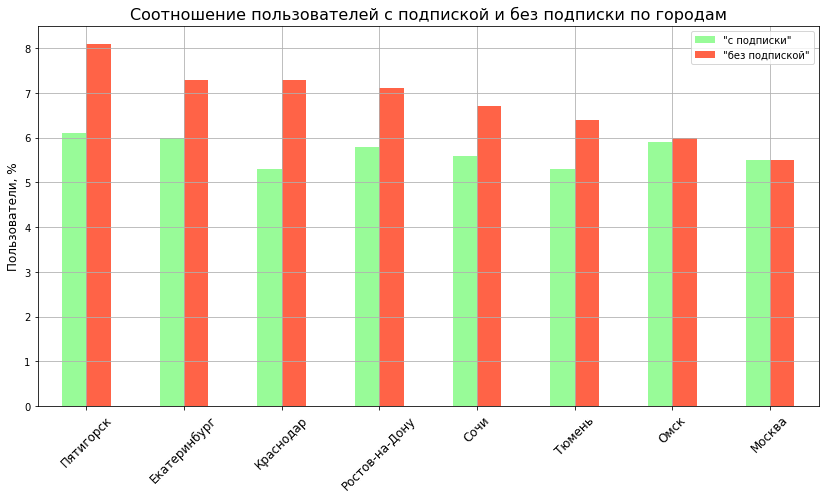

In [18]:
citys_ultra = users[users['subscription_type']=='ultra'].groupby('city')['user_id'].count().reset_index()
citys_ultra.columns = ['city', 'count_ultra']
citys_free = users[users['subscription_type']=='free'].groupby('city')['user_id'].count().reset_index()
citys_free.columns = ['city', 'count_free']
citys_sub = pd.merge(citys_ultra, citys_free, how = "inner", on = ['city', 'city'])
citys_sub['percent_ultra'] = round(((citys_sub['count_ultra']*100)/len(users)), 1)
citys_sub['percent_free'] = round(((citys_sub['count_free']*100)/len(users)), 1)
del citys_sub['count_ultra']
del citys_sub['count_free'] 
citys_sub.set_index('city', inplace=True)
display(citys_sub)

citys_sub.sort_values(by = ['percent_free', 'percent_ultra'], ascending = False)\
.plot.bar(figsize = (14,7), color = ['palegreen', 'tomato'], grid = True)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Соотношение пользователей с подпиской и без подписки по городам', fontsize = 16)
plt.legend(['"с подписки"', '"без подпиской"'])
plt.xlabel('')
plt.ylabel('Пользователи, %', fontsize = 12)
plt.show()

***Пояснение:***

- В данных представлены два типа подписок: 
  - "ultra" - официальная ежемесячная подписка на сервис GoFast 
  - "free" - бесплатная версия программы 
  
- 54,4% - пользователи с подпиской 

- 45,6% - пользователи без подписки 

- Разница между данными категориями небольшая => есть большое пространство для роста компании в плане развития системы подписок и стимуляции пользователей на их оформление

- В разрезе по городам: наибольшее количество пользователей с подпиской по отношению к пользователем без подписки в таких городах, как Москва, Омск и Тюмень. Также стоит отметить, что в Краснодаре, Пятигорск и Ростов-на-Дону данный показатель самый низкий.

___
<a id="research3"></a>
### Возраст пользователей

In [19]:
users.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

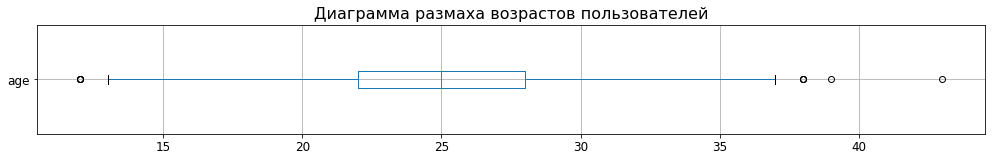

In [20]:
fig, ax = plt.subplots(figsize = (17,2))
ax = users[['age']].boxplot(vert = False, ax =ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_title('Диаграмма размаха возрастов пользователей', fontsize = 16)
plt.show()

In [21]:
def colors_for_bar (age):
        if age >= 18:
            return 'green'
        else:
            return 'red'
        
        
users ['colors'] = users ['age'].apply(colors_for_bar)

In [22]:
data = users.pivot_table (index = ['age', 'colors'], values = 'user_id', aggfunc = 'count').reset_index()

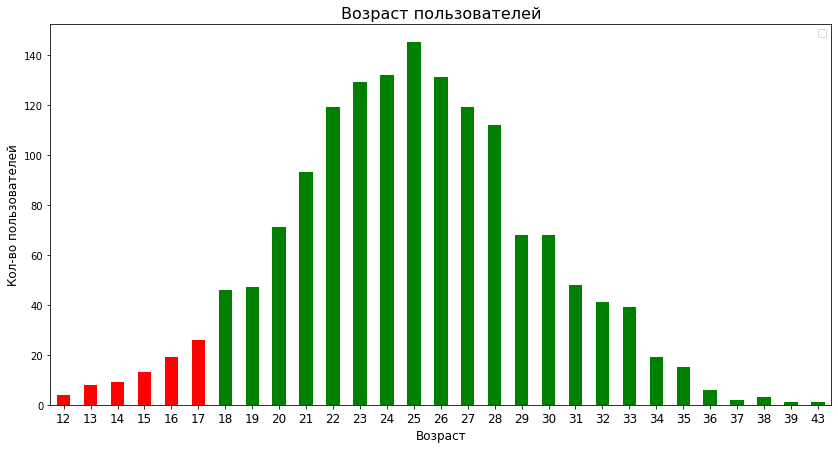

In [23]:
ax = data.plot.bar(x = 'age', y = 'user_id', figsize = (14,7), color = data['colors'])
plt.xticks(rotation = 360, fontsize = 12)
plt.title('Возраст пользователей', fontsize = 16)
plt.legend('')
plt.xlabel('Возраст', fontsize = 12)
plt.ylabel('Кол-во пользователей', fontsize = 12)
plt.show()

In [24]:
del users['colors']

***Пояснение:***

- В данных представлены пользователи возрастов от 12 до 43 лет.
- Чаще всего встречается возраст 25 лет.
- Наличие пользователей от 12 до 17 лет: многие сервисы прокатов электросамокатов (например, такие как Whoosh или Яндекс) ограничивают пользование своими услугам лицам недостигшим 18 лет. Данное решение обуславливается заботой о безопасности как самих пользователей, так и окружающих. Также предположительно, несовершеннолетние менее склонны оформлять подписку.

___
<a id="research4"></a>
### Расстояние, которое пользователь преодолел за одну поездку

In [25]:
rides.distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

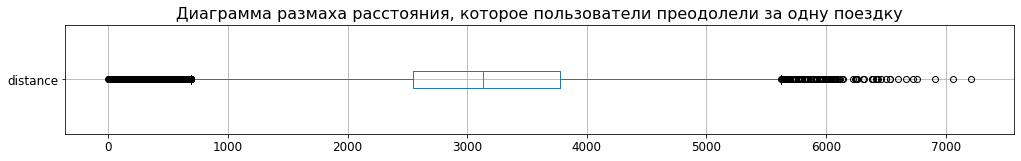

In [26]:
fig, ax = plt.subplots(figsize = (17,2))
ax = rides[['distance']].boxplot(vert = False, ax =ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_title('Диаграмма размаха расстояния, которое пользователи преодолели за одну поездку', fontsize = 16)
plt.show()

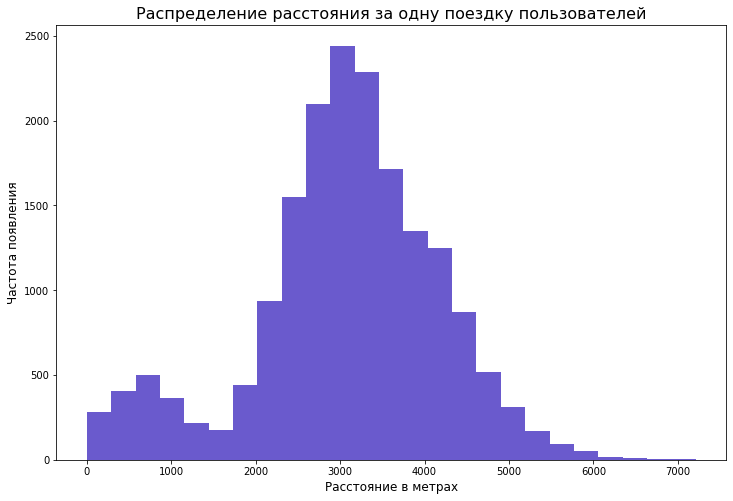

In [27]:
plt.figure(figsize=(12,8))
ax = rides.distance.plot.hist(bins=25, color = 'slateblue')
plt.xlabel('Расстояние в метрах', fontsize = 12)
plt.ylabel('Частота появления', fontsize = 12)  
plt.title('Распределение расстояния за одну поездку пользователей', fontsize = 16)
plt.show()

--------
________

In [28]:
#m_per_user = rides.groupby(['user_id'])['distance'].agg(['mean', 'median']).reset_index()
#m_per_user[['mean', 'median']].describe()

In [29]:
#fig, ax = plt.subplots(figsize = (17,2))
#ax = m_per_user[['mean', 'median']].boxplot(vert = False, ax =ax)
#plt.xticks(fontsize = 12)
#plt.yticks(fontsize = 12)
#ax.set_title('Диаграмма размаха медианного и среднего значений расстояния за одну поездку для каждого пользователя', fontsize = 16)
#ax.set (xlabel = '', ylabel = '')
#plt.show()

In [30]:
#plt.figure(figsize=(12,8))
#plt.hist([m_per_user['mean'], m_per_user['median']], bins=25, stacked = True, color = ['royalblue', 'orchid'])
#plt.xlabel('Расстояние в метрах', fontsize = 12)
#plt.ylabel('')  
#plt.title('Распределение медианного и среднего значений расстояния за одну поездку для каждого пользователя', fontsize = 16)
#plt.legend(['Средние значения', 'Медианное значения'])
#plt.show()

***Пояснение:***

- В среднем пользователи проезжают примерно 3134 метров за одну поездку.
- Медианное значение (менее подверженное аномальным значениям или выбросам в данных) составляет примерно 3071 метров.
- В данных также присутствуют выбросы, как, например, 7211 метров или 0.86 метров, однако, стоит предположить, что они не являются результатом ошибки, а лишь подчеркивают зависимость использования электросамокатов от различных факторов (погодные условия, конечная цель и т.д.).
- Стоит отдельно рассмотреть показатели минимальной дальности поездки на предмет неудовлетворенности пользователей сервисом.
- Вид гистограммы - бимодальный, что свидетельствует о том, что в данных обеих групп присутсвует две моды, то есть можно разделить данные для них на две группы, например, "короткие поездки" и "длинные поездки", что можно объяснить как "клиенты выбирают самокат для небольшого расстояния при опозданиях" и "клиенты выбирают самокат для больного расстояния при желании съэкономить".

___
<a id="research5"></a>
### Продолжительность поездок

In [31]:
rides.duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

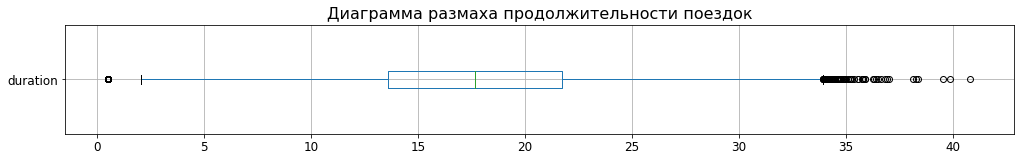

In [32]:
fig, ax = plt.subplots(figsize = (17,2))
ax = rides[['duration']].boxplot(vert = False, ax =ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.set_title('Диаграмма размаха продолжительности поездок', fontsize = 16)
plt.show()

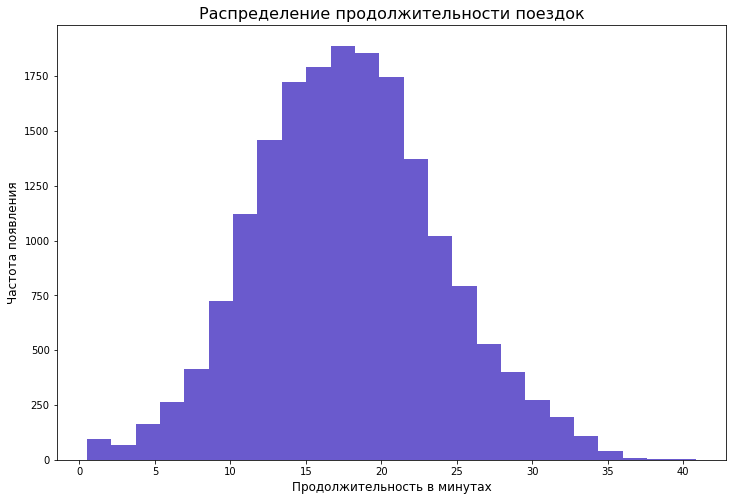

In [33]:
plt.figure(figsize=(12,8))
ax = rides.duration.plot.hist(bins=25, color = 'slateblue')
plt.xlabel('Продолжительность в минутах', fontsize = 12)
plt.ylabel('Частота появления', fontsize = 12)  
plt.title('Распределение продолжительности поездок', fontsize = 16)
plt.show()

In [34]:
rides_min = rides.query('duration < 2.0')
display (rides_min)
print('Процент аномально коротких поездок (продлились 0.5 минут):', round((len(rides_min)*100)/len(rides), 2))

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Процент аномально коротких поездок (продлились 0.5 минут): 0.53


In [35]:
#rides = rides.query('duration >= 2.0')

***Пояснение:***

- В среднем продолжительность одной поездки составляет примерно 18 минут.
- Медианное значение (менее подверженное аномальным значениям или выбросам в данных) также составляет примерно 18 минут.
- В данных также присутствуют выбросы, как, например, 41 минута или 0.5 минут. Однако, предположительно, только аномально долгие поездки не являются результатом ошибки, а лишь подчеркивают зависимость использования электросамокатов от различных факторов (погодные условия, конечная цель и т.д.).
- Отдельно были рассмотрены аномально короткие поездки (продлились 0.5 минут), их процент от всех данных составил 0,53%. Однако, в дальнейшем рекомендуется рассмотреть такие значения, так как они могут быть отражением технической ошибки сервиса или неудовлетворенности пользователей сервисом, но также причиной их появления может быть какая-либо акция.

___
<a id="merge"></a>
## Объединение данных
___

<a id="merge1"></a>
### Объединение датасетов
___

In [36]:
# Объединение датасетов users и subscriptions
users_sub = pd.merge(
     users, subscriptions, how="left", on= "subscription_type"
)

# Объединение датасетов rides и users-subscriptions
data_full = pd.merge(
     users_sub, rides, how="right", on=["user_id", "user_id"]
)

data_full.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8


In [37]:
# Проверка, что данные не потеряны/неизлишне
display (len(rides))
len(data_full)

18068

18068

____
<a id="merge2"></a>
### Создание датасетов пользователей "с подпиской" и "без подписки"
____

In [38]:
# Создание датасета с пользователями без подписки
without_subscrip = data_full.query ('subscription_type == "free"')
display (without_subscrip.head())

# Создание датасета с пользователями с подпиской
with_subscrip = data_full.query ('subscription_type == "ultra"')

display (with_subscrip.head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2


,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8


____
<a id="merge3"></a>
### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий
____

<a id="merge31"></a>
#### Время поездок

'Без подписки'

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

'С подпиской'

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

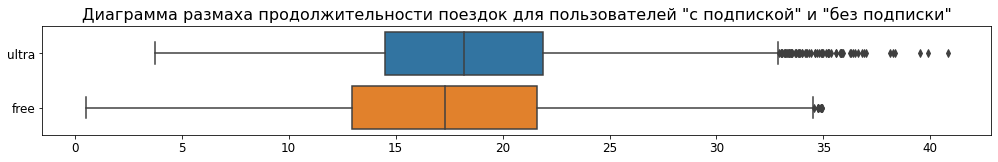

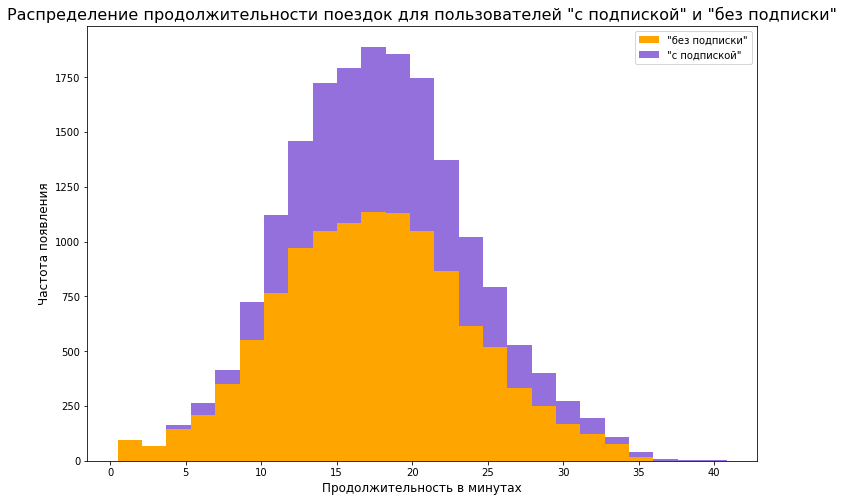

In [39]:
# Описание:
display ('Без подписки', without_subscrip['duration'].describe())
display ('С подпиской',with_subscrip['duration'].describe())

# Диаграмма размаха:
plt.figure (figsize = (17,2))
sns.boxplot(x = 'duration', y = 'subscription_type', data = data_full, orient='h')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Диаграмма размаха продолжительности поездок для пользователей "с подпиской" и "без подписки"', fontsize = 16)
plt.ylabel('') 
plt.xlabel('')
plt.show()

# Гистограмма:
plt.figure(figsize=(12,8))
plt.hist([without_subscrip['duration'], with_subscrip['duration']], bins=25, stacked = True, \
         color = ['orange', 'mediumpurple'])
plt.xlabel('Продолжительность в минутах', fontsize = 12)
plt.ylabel('Частота появления', fontsize = 12)    
plt.title('Распределение продолжительности поездок для пользователей "с подпиской" и "без подписки"', fontsize = 16)
plt.legend(['"без подписки"', '"с подпиской"'])
plt.show()

___
**Пояснение:**

"Продолжительность":

- Показатели двух групп пользователей очень близки друг к другу, например, среднее значение продолжительности поездки для подписчиков равно  18.6 минут, а для неподписчиков - 17.4 минут, или медиана, аналогично для первых - 18.1 минут, а для вторых - 17.3 минут.

- Вид гистограммы - колокольный, что свидетельствует о том, что данные обеих групп распределены нормально. Однако, есть небольшой пик в начале значений, скорее всего, это отражение аномально малых значений (равных 0.5 минут).

- В данных обеих групп присутствуют выбросы в виде очень малой продолжительности или, наоборот, очень большой. Более того, в данных "подписчиков" больше таких значений, чем в данных пользователей без подписки.
___

____
<a id="merge32"></a>
#### Расстояние поездок

'Без подписки'

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

'С подпиской'

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

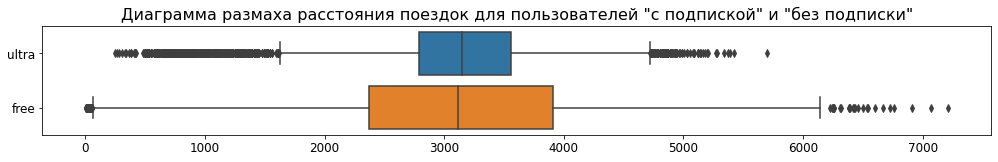

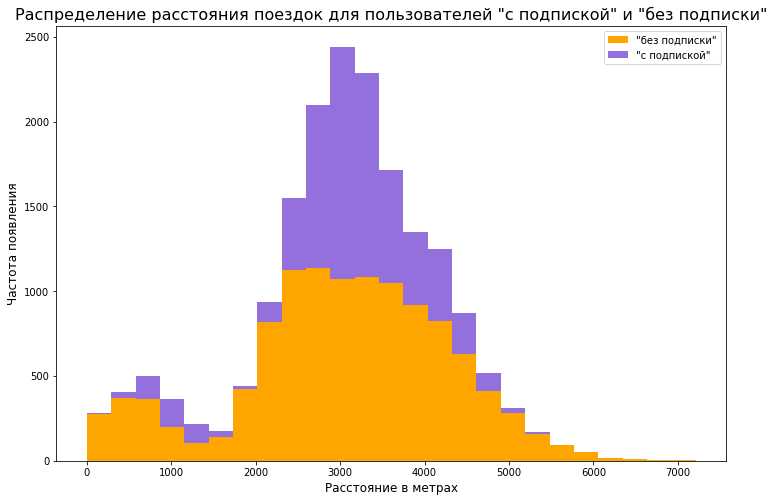

In [40]:
# Описание:
display ('Без подписки', without_subscrip['distance'].describe())
display ('С подпиской',with_subscrip['distance'].describe())

# Диаграмма размаха:
plt.figure (figsize = (17,2))
sns.boxplot(x = 'distance', y = 'subscription_type', data = data_full, orient='h')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Диаграмма размаха расстояния поездок для пользователей "с подпиской" и "без подписки"', fontsize = 16)
plt.ylabel('') 
plt.xlabel('')
plt.show()

# Гистограмма:
plt.figure(figsize=(12,8))
plt.hist([without_subscrip['distance'], with_subscrip['distance']], bins=25, stacked = True, \
         color = ['orange', 'mediumpurple'])
plt.xlabel('Расстояние в метрах', fontsize = 12)
plt.ylabel('Частота появления', fontsize = 12)    
plt.title('Распределение расстояния поездок для пользователей "с подпиской" и "без подписки"', fontsize = 16)
plt.legend(['"без подписки"', '"с подпиской"'])
plt.show()

___

**Пояснение:**

"Расстояние":

- Показатели двух групп пользователей близки друг к другу, например, среднее значение расстояния поездки для подписчиков равно 3115.4 метров, а для неподписчиков - 3045.5 метров, или медиана первых - 3148.6 метров, а для вторых - 3114.6 минут.

- Вид гистограммы - бимодальный, что свидетельствует о том, что в данных обеих групп присутсвует две моды, то есть можно разделить данные для них на две группы, например, "короткие поездки" и "длинные поездки".

- В данных обеих групп присутствуют выбросы в виде очень малого расстояния или, наоборот, очень большое. Более того, в данных "подписчиков" больше таких значений, чем в данных пользователей без подписки. 
___

___
<a id="revenue"></a>
## Подсчёт выручки
___

In [41]:
# Создание функции summary(x) для агрегации данных
#def summary(x):
    #result = {
        #'distance_sum': x['distance'].sum(),
        #'rides_count': x['month'].count(),
        #'duration_sum': x['duration'].sum()
    #}
    #return pd.Series(result)

# Применение функции summary(x) для создания нового датасета с агрегированными данными
#data_summed = data_full.groupby(['user_id', 'month', 'subscription_type']).apply(summary).reset_index()
#data_summed

In [42]:
# Округление значений продолжительности "до потолка" в объедененной таблице data_full
data_full['duration'] = np.ceil(data_full['duration']).astype('int')

In [43]:
# Создание нового датасета с агрегированными данными
data_summed = data_full\
.groupby(['user_id', 'month', 'subscription_type'])\
.agg({'distance': ['sum'], 'month': ['count'], 'duration': ['sum']})\
.reset_index()

# Переименование столбцов
data_summed.columns = ['user_id', 'month', 'subscription_type', 'distance_sum', 'rides_count', 'duration_sum']

data_summed

,user_id,month,subscription_type,distance_sum,rides_count,duration_sum
0,1,1,ultra,7027.511294,2,42
1,1,4,ultra,754.159807,1,7
2,1,8,ultra,6723.470560,2,46
3,1,10,ultra,5809.911100,2,32
4,1,11,ultra,7003.499363,3,56
...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,2,26
11327,1534,8,free,7622.453034,2,48
11328,1534,9,free,4928.173852,1,23
11329,1534,11,free,13350.015305,4,78


____

|| ***без подписки Free:*** | ***с подпиской Ultra:*** |
| --- | --- | --- |
|абонентская плата|  0 руб./месяц | 199 руб./месяц |
|стоимость одной минуты поездки|  8 руб.|6 руб.|
|стоимость старта (начала поездки)| 50 руб.|0 руб.|
|помесячная выручка|стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки|стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки|






In [44]:
# Подсчет выручки от пользователей (другие варианты):

# 1 вариант:
#for i in data_summed['subscription_type']:
    #if i == 'ultra':
        #data_summed['revenue'] = ((0 * data_summed ['rides_count']) + (6 * data_summed ['duration_sum']) + 199)
    #else: 
        #data_summed['revenue'] = (50 * data_summed ['rides_count']) + (8 * data_summed ['duration_sum']) + 0
#data_summed.head()


# 2 варинат:
#data_summed['revenue'] = np.where(data_summed['subscription_type']== 'ultra', \
                                  #((0 * data_summed ['rides_count']) + (6 * data_summed ['duration_sum']) + 199),\
                                  #((50 * data_summed ['rides_count']) + (8 * data_summed ['duration_sum']) + 0))

In [45]:
# Объединение датасетов data_summed и subscriptions 
data_summed = pd.merge(
     data_summed, subscriptions, how="left", on= "subscription_type"
)

In [46]:
# Подсчет выручки от пользователей 
data_summed['revenue'] = data_summed['start_ride_price']*data_summed['rides_count']\
+data_summed['minute_price']*data_summed['duration_sum']\
+data_summed['subscription_fee']

data_summed

,user_id,month,subscription_type,distance_sum,rides_count,duration_sum,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,7027.511294,2,42,6,0,199,451
1,1,4,ultra,754.159807,1,7,6,0,199,241
2,1,8,ultra,6723.470560,2,46,6,0,199,475
3,1,10,ultra,5809.911100,2,32,6,0,199,391
4,1,11,ultra,7003.499363,3,56,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,2,26,8,50,0,308
11327,1534,8,free,7622.453034,2,48,8,50,0,484
11328,1534,9,free,4928.173852,1,23,8,50,0,234
11329,1534,11,free,13350.015305,4,78,8,50,0,824


___
<a id="yesno"></a>
## Проверка гипотез
___

<a id="yesno1"></a>
### Проверка "времени"
___
- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

***Гипотеза H0:*** Пользователи с подпиской тратят столько же времени на поездки, что и пользователи без подписки.

***Гипотеза H1:*** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [47]:
# Уровень статистической значимости
alpha = 0.05

# Время первой группы пользователей (с подпиской)
first_group = with_subscrip['duration']

# Время второй группы пользователей (без подписки)
second_group = without_subscrip['duration']

# ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»;
# Продположение, что дисперсии не равны, так как разный размер выборки
results = st.ttest_ind(first_group, second_group, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# Проверка p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: временя равно.')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени.


***Вывод:*** 

Полученное значение p-value меньше заданного уровня значимости (alpha = 0.05), поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

___
<a id="yesno2"></a>
### Проверка "расстояния"
___
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

***Гипотеза H0:*** Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

***Гипотеза H1:*** Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [48]:
 # Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку
interested_value = 3130

# Уровень статистической значимости
alpha = 0.05 

# ttest для одной выборки, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_1samp(
    with_subscrip['distance'], 
    interested_value,
    alternative='greater')

# Проверка p-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние больше 3130 метров.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130 метров.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: среднее расстояние не превышает 3130 метров.


***Вывод:*** 

Полученное значение p-value больше заданного уровня значимости (alpha = 0.05), поэтому не рекомендуется отвергать нулевую гипотезу. Есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

___
<a id="yesno3"></a>
### Проверка "выручки"
___
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

***Гипотеза H0:*** Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

***Гипотеза H1:*** Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [49]:
# Уровень статистической значимости
alpha = 0.05

# Выручка первой группы пользователей (с подпиской)
first_group = data_summed[data_summed['subscription_type']=='ultra']['revenue']

# Выручка второй группы пользователей (без подписки)
second_group = data_summed[data_summed['subscription_type']=='free']['revenue']

# ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»;
# Продположение, что дисперсии не равны, так как разный размер выборки
results = st.ttest_ind(first_group, second_group, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# Проверка p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: помесячные выручки равны')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.


***Вывод:***

Полученное значение p-value меньше заданного уровня значимости (alpha = 0.05), поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

___
<a id="yesno4"></a>
### Проверка "изменения"
___
- Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?

***Гипотеза H0:*** Количество обращений в техподдержку не изменилось.

***Гипотеза H1:*** Количество обращений в техподдержку значимо снизилось.

***Необходимый тест:*** Двухвыборочный t-тест для зависимых выборок; метод scipy.stats.ttest_rel

___
<a id="distr"></a>
## Распределения
___

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [50]:
#from matplotlib import pyplot as plt
#from math import factorial

#p = 0.1
#n = 100

#distr = []

#for k in range(0, n + 1):
    #choose = factorial(n) / (factorial(k) * factorial(n-k))
    #prob = choose * p**k * (1 - p)**(n - k) 
    #distr.append(prob)
    
#plt.bar(range(0, n + 1), distr)

___
<a id="end"></a>
## Вывод
___

***Обзор и предобработка данных:***

Были получены:
- файл `users` с уникальными идентификаторами пользователей, их именами, возрастом, городом и типом подписки; 
- файл `rides` с уникальными идентификаторами пользователей, расстоянием, которое пользователь проехал в текущей сессии (в метрах), продолжительностью сессии (в минутах) и датой совершения поездки; 
- файл `subscriptions` с типом подписки, стоимостью одной минуты поездки по данной подписке, стоимостью начала поездки, стоимостью ежемесячного платежа.

При предобработке: 
- Изменен тип данных в столбце *date* из файла `rides`;
- В файл `rides` добавлен столбец *month* с номером месяца поездки; 
- Были удалены дубликаты в файле `users`.
- Определен временной промежуток данных, который составил 1 год: с 2021-01-01 по 2021-12-30.

***Исследовательский анализ данных:***

Было получено, что:
- Сервис доступен в 8 городах России, при чем Москва находится на последнем месте по количеству пользователей GoFast; Топ-3 городов: Пятигорск, Екатеринбург, Ростов-на-Дону;
  
- Предоставляется два способа использования сервиса: 
|| ***без подписки Free:*** | ***с подпиской Ultra :*** |
| --- | --- | --- |
|% пользователей|45,6%|54,4%|
|абонентская плата|  0 руб./месяц | 199 руб./месяц |
|стоимость одной минуты поездки|  8 руб.|6 руб.|
|стоимость старта (начала поездки)| 50 руб.|0 руб.|
|помесячная выручка|стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки|стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки|
  
- В разрезе по городам: наибольшее количество пользователей с подпиской по отношению к пользователем без подписки в таких городах, как Москва, Омск и Тюмень. Также стоит отметить, что в Краснодаре, Пятигорск и Ростов-на-Дону данный показатель самый низкий;
  
- В данных представлены пользователи возрастов от 12 до 43 лет, чаще всего встречается возраст 25 лет; 

- В среднем пользователи проезжают примерно 3134 метров за одну поездку; Медианное значение составляет примерно 3071 метров; В данных также присутствуют выбросы, как, например, 7211 метров или 0.86 метров; 

- В среднем продолжительность одной поездки составляет примерно 18 минут; Медианное значение также составляет примерно 18 минут; В данных также присутствуют выбросы, как, например, 41 минута или 0.5 минут; Такие аномальные зачения были оставлены в даных без изменений.

***Для более детального рассмотрения данных:***
- На основе имеющихся данных была создана таблица (`data_full`), объединяющая все три изначальные таюлицы;
- Далее на основе таблицы `data_full` были созданы две таблицы отдельно для пользователей с подпиской и без нее (`with_subscrip` и `without_subscrip` соответственно);
- После были описаны данные о продолжительности и протяженности поездок для кажой категории пользователей;
- Также на основе таблицы `data_full` была создана таблица `data_summed` с подсчетом суммарного расстояния, количеством поездок, суммарным временем и выручкой для каждого пользователя за каждый месяц.

***Проверка гипотез:***

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

*Результат: Согласно анализу есть основания говорить, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки*. 

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

*Результат: Есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров*.

3. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

*Результат: Есть основания говорить, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки*.

4. Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?

*Результат: Необходимый тест - двухвыборочный t-тест для зависимых выборок; метод scipy.stats.ttest_rel*

___
<a id="endless"></a>
## Рекомендации:
___

___
***По общим данным:*** 
___
 **1. ГОРОДА**: 

Рассмотреть повышение присутствия в таких городах как Москва, Омск и Тюмень: сервис GoFast уже представлен в данных городах, но совокупное количество пользователей ниже, чем в остальных пяти. Однако, соотношение "с подпиской"-"без подписки" наиболее высокие, то есть пользователи в данных городах с большей вероятностью оформят подписку.

 **2. ПОДПИСКИ**: 

Рассмотреть повышение числа пользователей с подпиской: разница между категориями "с подпиской" и "без подписки" небольшая => есть большое пространство для роста компании в плане развития системы подписок и стимуляции пользователей на их оформление. Возможно, необходимо разнообразить планы подписок.

 **3. ВОЗРАСТ**: 
 
Рассмотреть возможность ограничения использование сервиса несовершеннолетними: данное предложение основывается на общей тенденции сервисов проката электросамокатов ввиду мер безопасности как самих водителей, так и окружающих. Как дополнительный фактор к данной рекомендации можно отности низкую платежеспособность пользователей младше 18 лет.

 **4. РАССТОЯНИЕ И ПРОДОЛЖИТЕЛЬНОСТЬ**:

Рассмотреть наиболее низкие и высокие значения для таких показателей как расстояние и продолжительность сессии и причины их возникновения: 
- малые аномальные значения могут свидетельствовать о каких-либо проблемах в использовании продукта (электросамоката), которые препятствуют продолжению поездки клиента (например, ошибка сервиса), а также способны понизить удовлетворенность клиента от сервиса;
- большие аномальные значения могут свидетельствовать о частоте очень длительного использования электросамоката, что может приводить к его изнашиванию и различным поломкам.

___
***По гипотезам:*** 
___

 **1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.**
 
 и 
 
 **2. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.**
 
Опираясь на результат анализа, можно сказать, что пользователи с подпиской "выгоднее" сервису, поэтому стоит продвигать подписки среди пользователей. В пул возможных стратегий продвижения могут входить акции для подписчиков или для определенных групп пользователей, кэшбэк, специальные предложения или другие дополнительные привилегии.

 **3. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.**
 
Опираясь на результат анализа, можно сказать, что пользователи с подпиской проезжают в среднем мене 3130 метров за одну сессию, что является оптимальным с точки зрения износа самоката. Однако, стоит отдельно рассмотреть площадь действия самокатов, расположение "станций" и пути клиентов в целях оптимизации размещения. Данные меры могут способствовать сокращению расстояния пройденого за одну сессию, в следствии чего уменьшить износ самокатов.